<a href="https://colab.research.google.com/github/siaSim/keras_deeplearning/blob/main/4_1(Classification%26Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4.1 영화 리뷰 분류 : 이진 분류 문제**

**4.1.1 IMDB 데이터셋**

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review=" ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 1s 0us/step


**4.1.2 데이터 준비**

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [5]:
x_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [6]:
y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

**4.1.3 신경망 모델 만들기**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                        ])

In [8]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**4.1.4 훈련검증**

In [9]:
x_val = x_train[:10000]
partial_x_train=x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 118ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 2/20
30/30 [==============================] - 3s 105ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 3/20
30/30 [==============================] - 2s 77ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 4/20
30/30 [==============================] - 2s 73ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 5/20
30/30 [==============================] - 2s 75ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 6/20
30/30 [==============================] - 2s 66ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 8/20


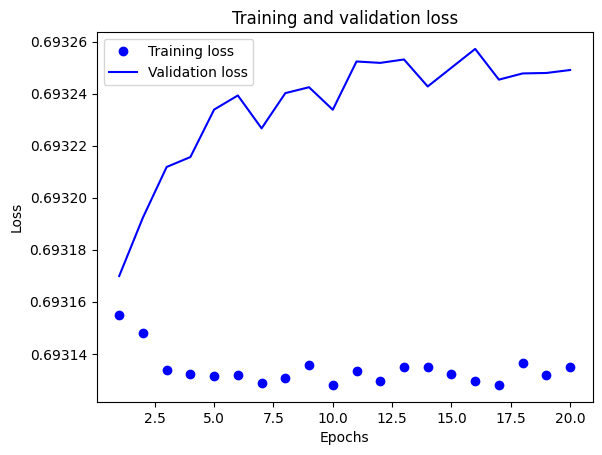

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

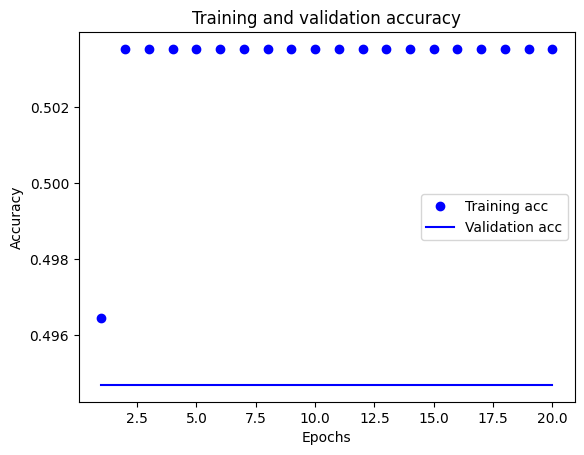

In [15]:
# plt.clf()
# acc = history_dict["accuracy"]
# val_acc=history_dict["val_accuracy"]
# plt.plot(epochs, acc, "bo", label="Training acc")
# plt.plot(epochs, val_acc, "b", label="Validation acc")
# plt.title("Training and validation accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
#4-19
model=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,y_train,epochs=4, batch_size=512)
results=model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 41ms/step - loss: 0.6932 - accuracy: 0.4983
Epoch 2/4
49/49 [==============================] - 2s 36ms/step - loss: 0.6932 - accuracy: 0.4984
Epoch 3/4
49/49 [==============================] - 2s 36ms/step - loss: 0.6932 - accuracy: 0.4936
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5000
